In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


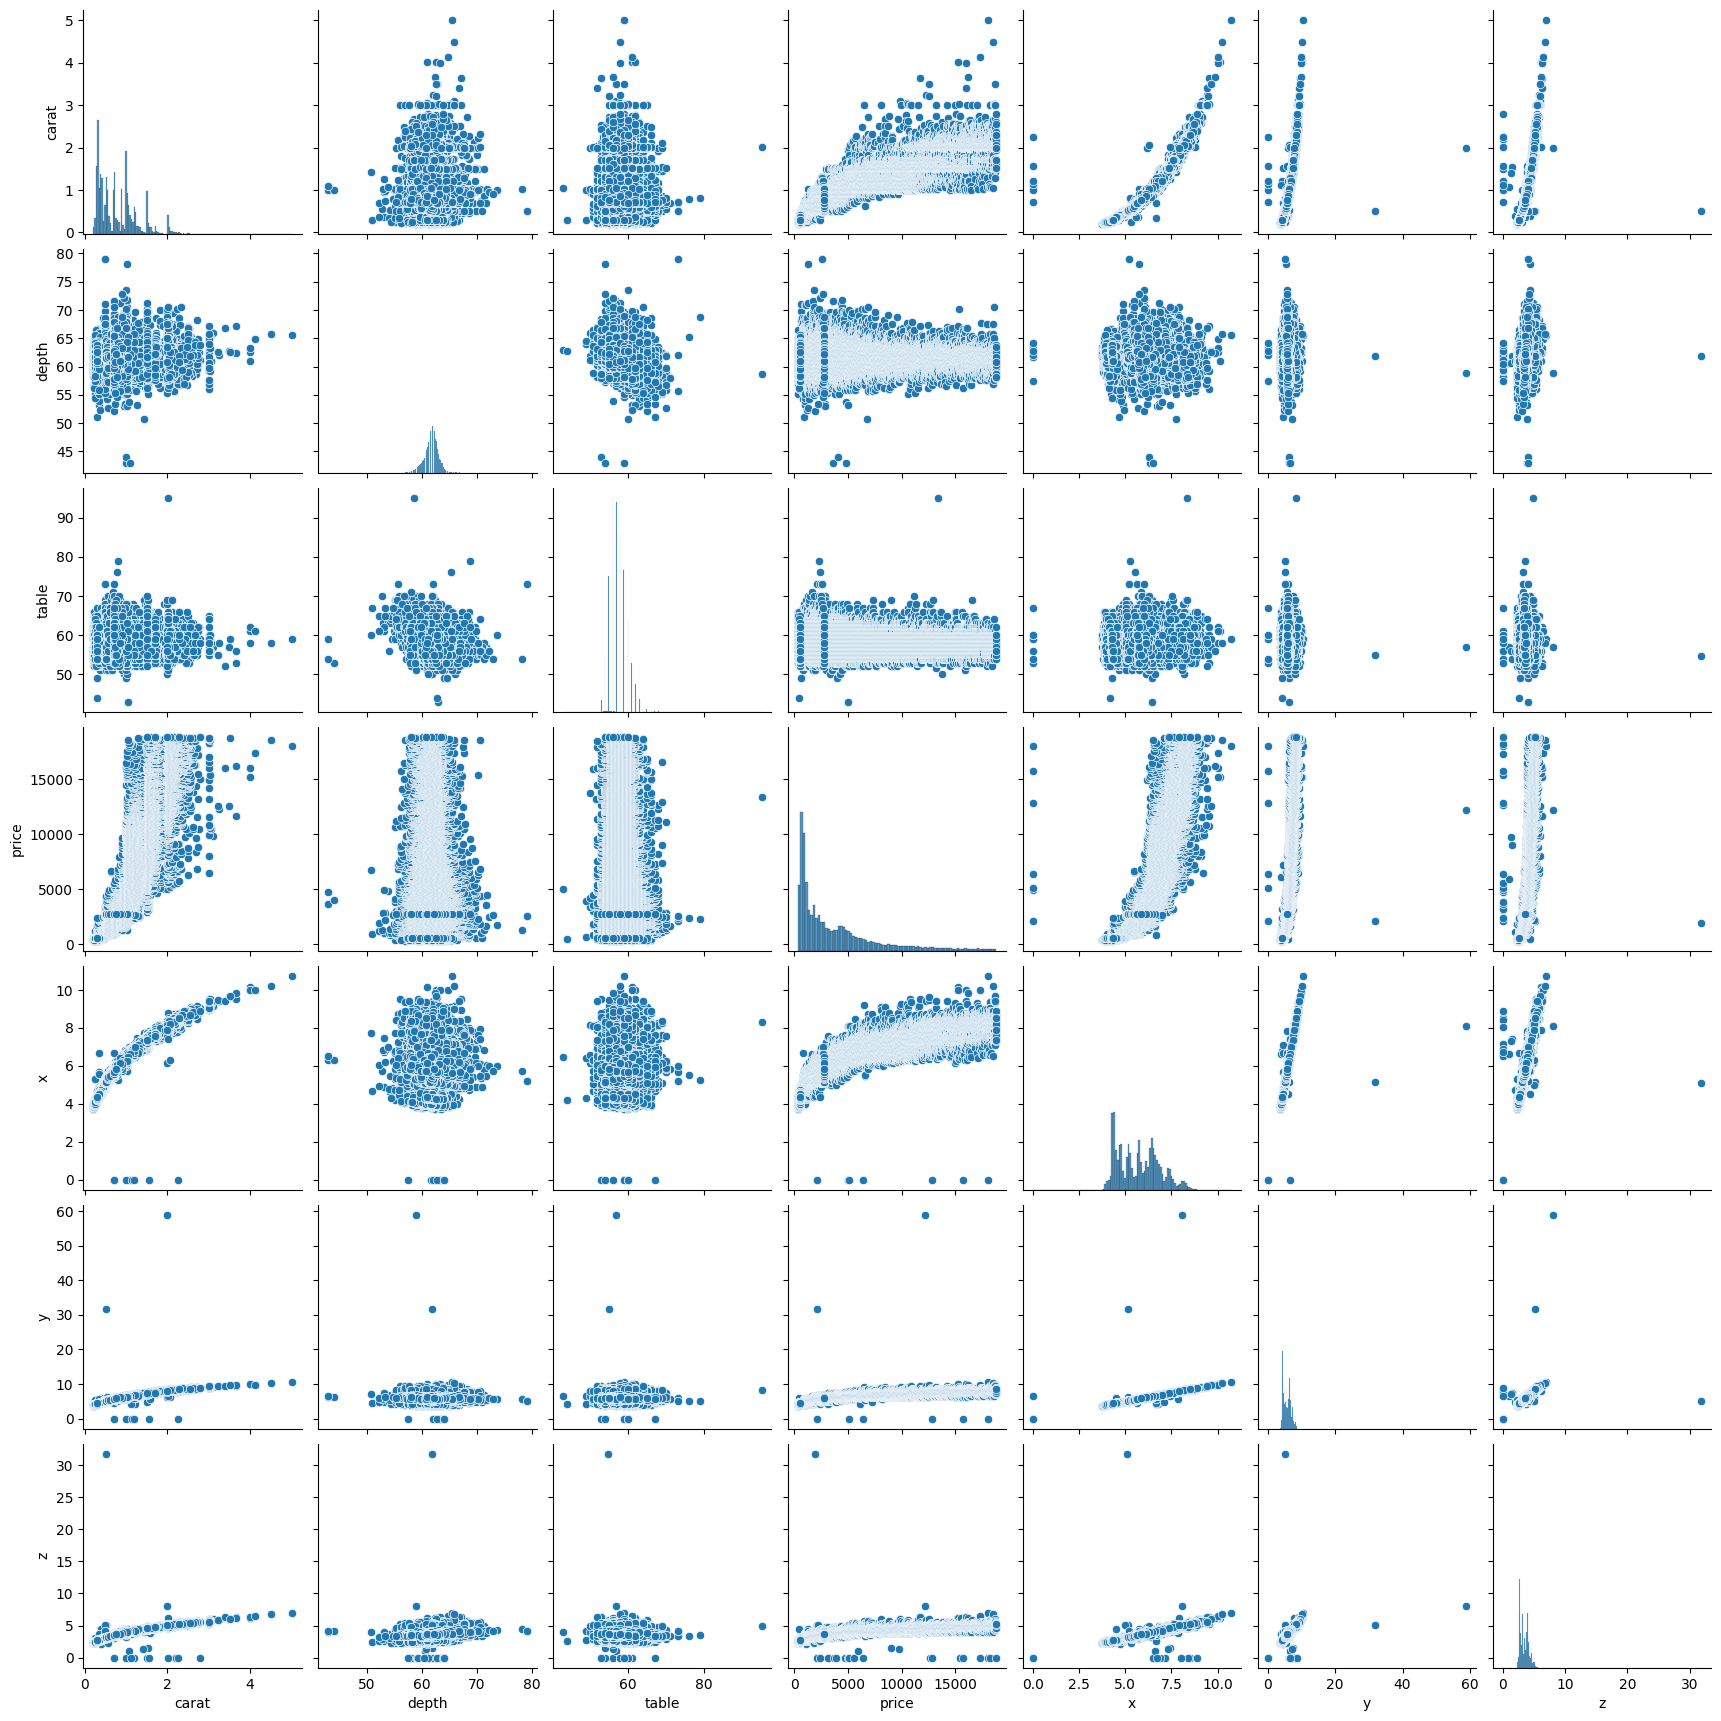

In [4]:
sns.pairplot(diamonds.drop(['cut','color','clarity'],axis='columns'))

<Axes: >

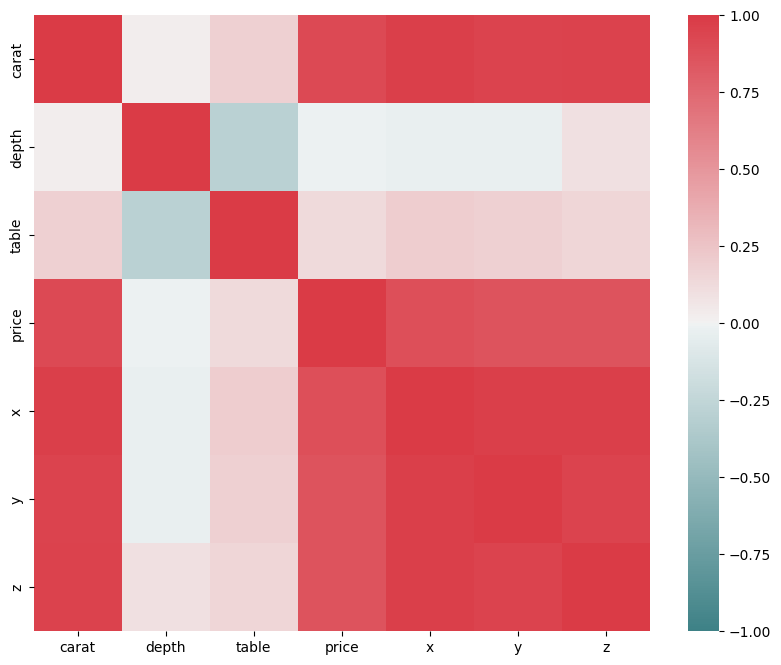

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = diamonds.drop(['cut','color','clarity'],axis='columns').corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(200, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

<Axes: >

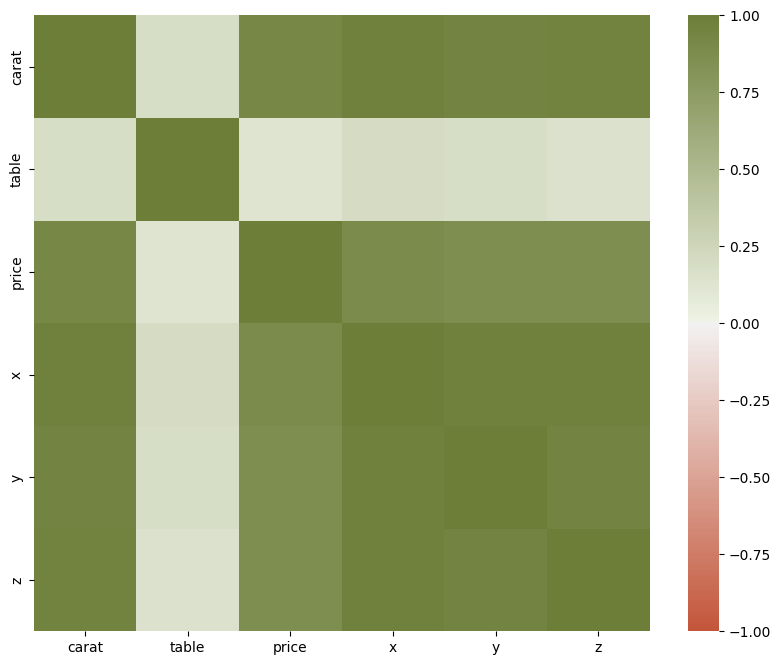

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = diamonds.drop(['cut','color','clarity','depth'],axis='columns').corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(20, 100, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax,)

<Axes: >

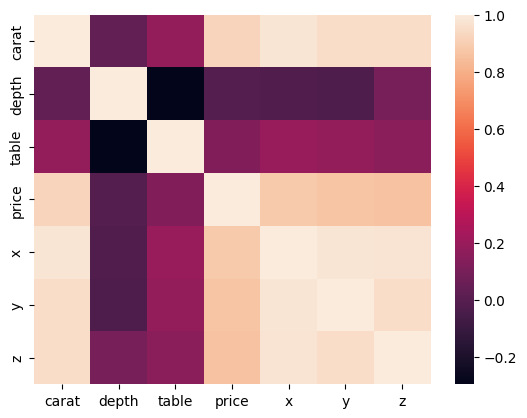

In [7]:
corr = diamonds.drop(['cut','color','clarity'],axis='columns').corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

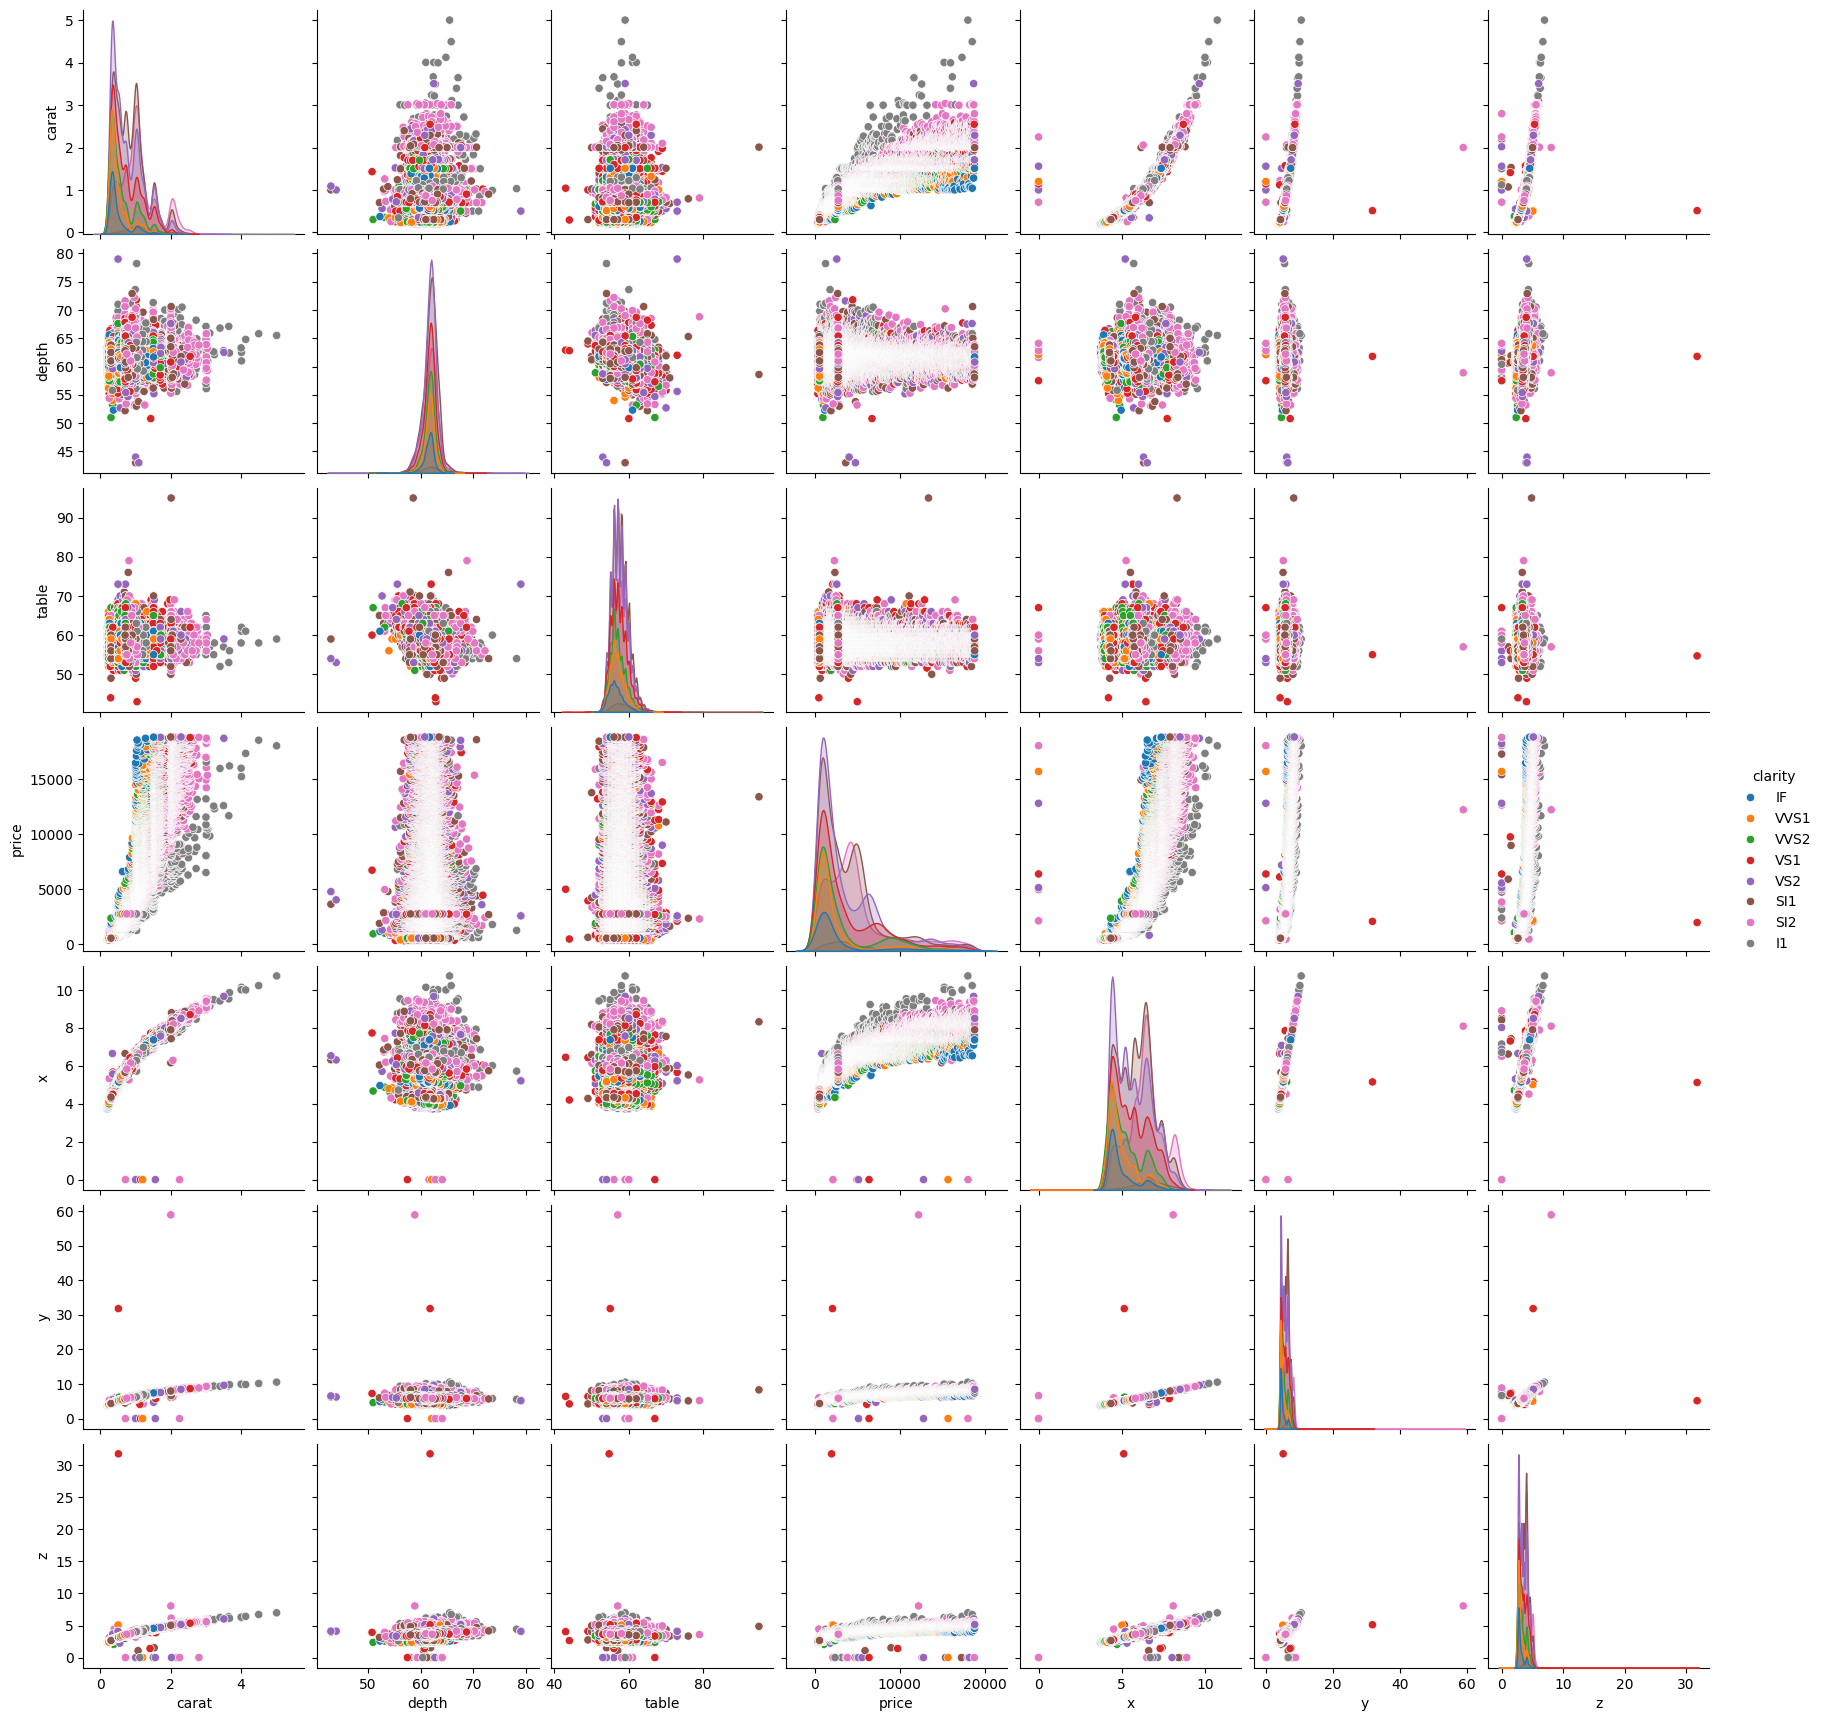

In [10]:
sns.pairplot(diamonds , hue = 'clarity')

In [30]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
x = diamonds.drop(['cut','color','clarity','price'],axis='columns')
x.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [37]:
y = diamonds.price
y.head()

y.shape

(53940,)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.9269558769002596)
model = LinearRegression().fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [41]:
model.predict(x_test[:10])

array([7115., 6841., 6097., 3045., 6204., 4946., 2526., 5510.,  982.,
       1151.])

In [42]:
y_test[:10]

17659    7115
17140    6841
15173    6097
1763     3045
15489    6204
11157    4946
52506    2526
13419    5510
37389     982
40557    1151
Name: price, dtype: int64

In [43]:
model.intercept_

4.638422979041934e-11

In [44]:
model.coef_

array([ 6.67544397e-11, -1.05371267e-12, -5.08296462e-13,  1.00000000e+00,
        2.23318651e-13,  4.52214221e-14,  9.00877951e-14])

In [45]:
y_pred = model.predict(x_test)
y_pred

array([7115., 6841., 6097., ..., 3751., 2670., 1694.])

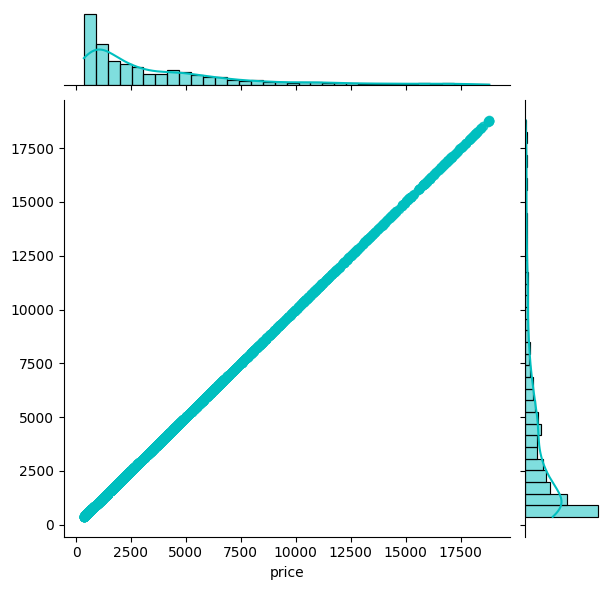

In [67]:
sns.jointplot(x=y_test, y = y_pred, kind='reg', color = 'c')